In [113]:
# project: p10
# submitter: rrgeorge
# partner: none

In [1]:
import pandas as pd
import os
import requests
import sqlite3 as sq
from pandas import DataFrame
import json
import math
from math import radians, cos, sin, asin, sqrt

In [2]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # TODO: Write the code to download the file from URL
    # and save it in `filename`
    else:
        a = requests.get(url)
        a.raise_for_status()
        data = a.text
        with open(filename, "w") as obj:
            json.dump(json.loads(data), obj)
        obj.close()
    return (str(filename) + " created!")

In [3]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")

'countries.json already exists!'

In [4]:
countries = pd.read_json("countries.json")

In [5]:
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
#Q1
len(countries["country"])

174

In [7]:
#Q2
pd.Series(countries["population"]).sum()

6261901793

In [8]:
download("capitals.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")

'capitals.json already exists!'

In [9]:
capitals = pd.read_json("capitals.json")
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [10]:
#Q3
list(sorted(capitals["capital"]))

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [11]:
#Q4
a = capitals[capitals["country"] == "Italy"]
next(iter(pd.Series(a["capital"])))


'Rome'

In [12]:
#Q5
next(iter(pd.Series(capitals[capitals["capital"]=="Brussels"]["country"])))

'Belgium'

In [13]:
capitals[capitals["capital"]=="Brussels"]

,country,capital,latitude,longitude
14,Belgium,Brussels,50.833333,4.333333


In [14]:
#Q6
a = capitals
b = a.sort_values(by = ["latitude"])
list(b["country"][:7])

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [15]:
#Q7
a = capitals
b = a.sort_values(by = ["latitude"], ascending = False)
list(b["country"][:10])

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [16]:
def habersine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956
    return c * r
#grabbed from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [17]:
#Q8
habersine(-89.411893, 43.070231, -89.384113, 43.074645)

1.433899492072933

In [18]:
lat1= next(iter(pd.Series(capitals[capitals["country"]=="Germany"]["latitude"])))
lon1= next(iter(pd.Series(capitals[capitals["country"]=="Germany"]["longitude"])))
lat2= next(iter(pd.Series(capitals[capitals["country"]=="Norway"]["latitude"])))
lon2 = next(iter(pd.Series(capitals[capitals["country"]=="Norway"]["longitude"])))

In [19]:
#Q9
habersine(lon1, lat1, lon2, lat2)

520.8581822565817

In [20]:
def make_df(l_o_c):
    df = {}
    big_df = {}
    for country in l_o_c:
        for other_c in l_o_c:
            if country == other_c:
                pass
            else:
                lat1= next(iter(pd.Series(capitals[capitals["country"]==country]["latitude"])))
                lon1= next(iter(pd.Series(capitals[capitals["country"]==country]["longitude"])))
                lat2= next(iter(pd.Series(capitals[capitals["country"]==other_c]["latitude"])))
                lon2 = next(iter(pd.Series(capitals[capitals["country"]==other_c]["longitude"])))
                df[other_c] = habersine(lon1,lat1,lon2,lat2)
        big_df[country] = df
        df = {}
    return pd.DataFrame(big_df)

In [21]:
cntry = list(capitals["country"])
new_list = []
for country in cntry:
    if country in ("Switzerland", "Netherlands", "Spain"):
        new_list.append(country)


In [22]:
#Q10
make_df(new_list)

,Netherlands,Spain,Switzerland
Spain,919.684100,NaN,714.804467
Switzerland,392.028643,714.804467,NaN
Netherlands,NaN,919.684100,392.028643


In [23]:
s_a = list(countries[countries["continent"] == "South America"]["country"])

In [24]:
#Q11
make_df(s_a)

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964
Uruguay,833.403262,2878.638295,2962.230943,2809.744412,1412.096335,1467.253638,3207.352176,143.069943,2046.571589,2791.196721,NaN,667.699386


In [25]:
#Q12
dafra = make_df(s_a)
means = pd.Series(DataFrame.mean(dafra))
sorted_means = means.sort_values()
sorted_means.index[0]

'Bolivia'

In [26]:
#Q13
dafra = make_df(s_a)
means = pd.Series(DataFrame.mean(dafra))
sorted_means = means.sort_values(ascending = False)
sorted_means.index[0]

'Uruguay'

In [27]:
#Q14
dafra = make_df(s_a)
neighbor = pd.Series(DataFrame.idxmin(dafra))
distance = pd.Series(DataFrame.min(dafra))
dicta = {}
for key in neighbor.index:
    dicta[key] = {"nearest":neighbor[key], "distance":distance[key]}
pd.DataFrame(dicta).T

,nearest,distance
Chile,Argentina,690.784
Guyana,Suriname,215.336
Colombia,Ecuador,451.004
Suriname,Guyana,215.336
Brazil,Paraguay,908.186
Bolivia,Peru,669.926
Venezuela,Colombia,639.361
Argentina,Uruguay,143.07
Peru,Bolivia,669.926
Ecuador,Colombia,451.004


In [28]:
#Q15
dafra = make_df(s_a)
neighbor = pd.Series(DataFrame.idxmax(dafra))
distance = pd.Series(DataFrame.max(dafra))
dicta = {}
for key in neighbor.index:
    dicta[key] = {"furthest":neighbor[key], "distance":distance[key]}
pd.DataFrame(dicta).T

,furthest,distance
Chile,Venezuela,3043.66
Guyana,Chile,2897.55
Colombia,Uruguay,2962.23
Suriname,Chile,2895.81
Brazil,Ecuador,2344.58
Bolivia,Venezuela,1865.13
Venezuela,Uruguay,3207.35
Argentina,Venezuela,3157.62
Peru,Uruguay,2046.57
Ecuador,Uruguay,2791.2


In [29]:
conn= sq.connect("countries.db")
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [30]:
pd.read_sql("select * from sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,countries,countries,2,"CREATE TABLE ""countries"" (\n""area"" INTEGER,\n ..."
1,table,capitals,capitals,8,"CREATE TABLE ""capitals"" (\n""country"" TEXT,\n ..."


In [67]:
def qry(sql, cap=10000):
    return pd.read_sql(sql, conn).head(cap)

In [68]:
#Q16
a = qry("""
select continent, count(*) as 'number of countries'
from countries
group by continent
order by count(*)
""")
a

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [69]:
import matplotlib

In [70]:
matplotlib.rcParams["font.size"] = 18

Text(0, 0.5, 'number of countries')

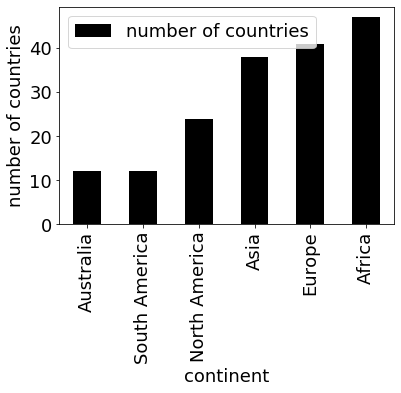

In [71]:
#Q17
w = a.plot.bar(x = "continent", y = "number of countries",color = "k")
w.set_xlabel("continent")
w.set_ylabel("number of countries")

In [72]:
#Q18
area = qry("""
select continent, sum(area) as 'total area'
from countries
group by continent
order by sum(area) DESC
""")
area

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


Text(0, 0.5, 'total area')

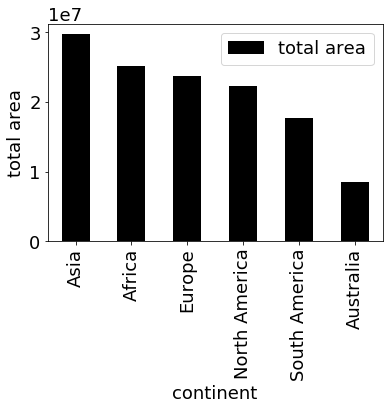

In [73]:
#Q19
area_graph = area.plot.bar(x = "continent", y = "total area",color = "k")
area_graph.set_xlabel("continent")
area_graph.set_ylabel("total area")

In [74]:
#Q20
area = qry("""
select country, area
from countries
where continent = 'South America'
order by area DESC
""")
area

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [84]:
#Q21
area = qry("""
select country, ((population * `gdp-per-capita`)/1000000000.0) as `real GDP (billion)`
from countries
order by `real GDP (billion)` DESC
limit 8
""")
area

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690


Text(0, 0.5, 'realGDP(billion)')

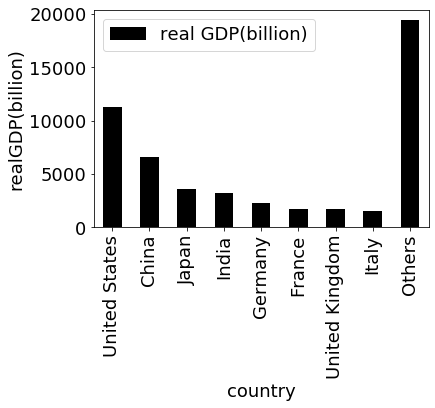

In [76]:
#Q22
gdp = qry("""
select country, ((population * `gdp-per-capita`)/1000000000.0) as `real GDP(billion)`
from countries
order by `real GDP(billion)` DESC
""")

other1 = gdp[8:]
gdp = gdp[:8]

o = {"country": "Others", "real GDP(billion)" : [sum(other1["real GDP(billion)"])]}
other_df = pd.DataFrame(data = o)
master = DataFrame.append(gdp,other_df)

area_graph = master.plot.bar(x = "country", y = "real GDP(billion)",color = "k")
area_graph.set_xlabel("country")
area_graph.set_ylabel("realGDP(billion)")

Text(0, 0.5, 'net-migration')

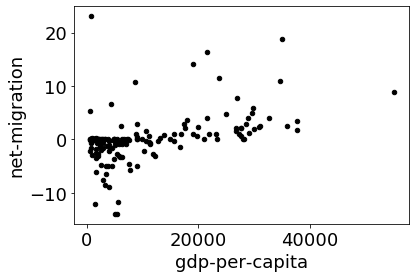

In [77]:
#Q23
qury = qry("""
select `gdp-per-capita`, `net-migration`
from countries
""")
area_graph = qury.plot.scatter(x = "gdp-per-capita", y = "net-migration",color = "k")
area_graph.set_xlabel("gdp-per-capita")
area_graph.set_ylabel("net-migration")

In [78]:
#Q24
corr = qry("""
select `gdp-per-capita`, `net-migration`
from countries
""").corr()
next(iter(pd.Series(corr.iloc[1])))

0.4523211325011283

Text(0, 0.5, 'death-rate')

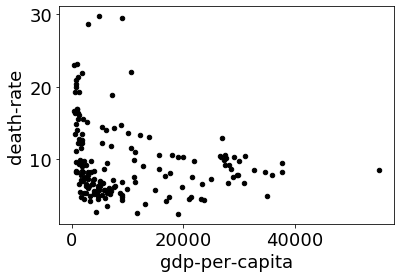

In [79]:
#Q25
qury = qry("""
select `gdp-per-capita`, `death-rate`
from countries
""")
area_graph = qury.plot.scatter(x = "gdp-per-capita", y = "death-rate",color = "k")
area_graph.set_xlabel("gdp-per-capita")
area_graph.set_ylabel("death-rate")

Text(0, 0.5, 'infant-mortality')

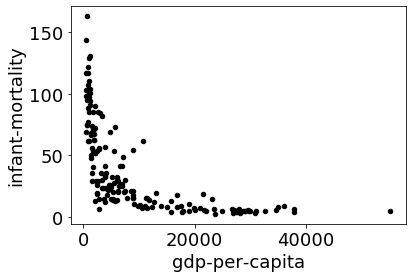

In [80]:
#Q26
qury = qry("""
select `gdp-per-capita`, `infant-mortality`
from countries
""")
area_graph = qury.plot.scatter(x = "gdp-per-capita", y = "infant-mortality",color = "k")
area_graph.set_xlabel("gdp-per-capita")
area_graph.set_ylabel("infant-mortality")

Text(0, 0.5, 'inverse infant-mortality')

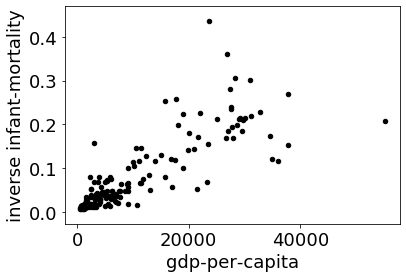

In [81]:
#Q27
qury = qry("""
select `gdp-per-capita`, 1/`infant-mortality` as inverse
from countries
""")
area_graph = qury.plot.scatter(x = "gdp-per-capita", y = "inverse",color = "k")
area_graph.set_xlabel("gdp-per-capita")
area_graph.set_ylabel("inverse infant-mortality")

In [85]:
import numpy as np


In [100]:
#Q28
df = qry("""
select `gdp-per-capita`, 1/`infant-mortality` as inverse
from countries
""")

df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept

slope_intercept = (m,n)
slope_intercept

(6.482983154848297e-06, 0.013237849092120857)

In [111]:
#Q29
(slope_intercept[0] * 50000)+ slope_intercept[1]

0.33738700683453565

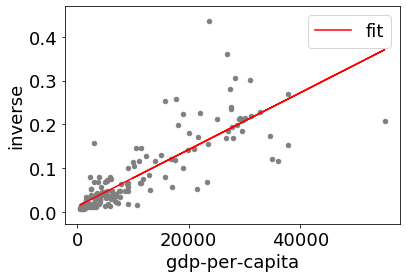

In [98]:
#Q30
ax = df.plot.scatter(x='gdp-per-capita', y='inverse', color = "grey")

df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)